In [132]:
import pandas as pd
import seaborn as sns
from google.colab import files

In [133]:
url_clf_antifungal = "https://raw.githubusercontent.com/AnaLuisaIA/antifungal-peptides/08105d22cab50501378e1b97966b4d44d09d9de2/Base%20de%20datos/Antifungipept/clf_antifungal.csv"

df_clf_antifungal = pd.read_csv(url_clf_antifungal)
df_clf_antifungal.to_csv("clf_antifungal.csv", index=False)
df_clf_antifungal.head()

,Sequence,Antifungal,Split
0,AAAAGSCVWGAVNYTSDCAAECKRRGYKGGHCGSFANVNCWCET,True,test
1,AAAAGSCVWGAVNYTSDCAAECKRRGYKGGHCGSFANVNCWCRT,True,train
2,AAAAGSCVWGAVNYTSDCAAECLLRGYKGGHCGSFANVNCWCET,True,train
3,AAAAGSCVWGAVNYTSDCAAECLLRGYKGGHCGSFANVNCWCRT,True,train
4,AAAAGSCVWGAVNYTSDCNGECKRRGYKGGHCGSFANVNCWCET,True,train


La Data contiene valores positivos y negativos así que las separaremos para luego incorporar label y concatenar

In [134]:
df_clf_antifungal.shape

(11550, 3)

In [135]:
df_clf_antifungal["Antifungal"].value_counts()

,count
Antifungal,
True,5775
False,5775


In [136]:
df_clf_antifungal_pos = df_clf_antifungal[df_clf_antifungal["Antifungal"] == True]
df_clf_antifungal_neg = df_clf_antifungal[df_clf_antifungal["Antifungal"] == False]

#Importamos los otros Dataset que solo contemplan positivos

In [137]:
url_reg_Candida_albicans = "https://raw.githubusercontent.com/AnaLuisaIA/antifungal-peptides/08105d22cab50501378e1b97966b4d44d09d9de2/Base%20de%20datos/Antifungipept/reg_Candida%20albicans.csv"

df_reg_Candida_albicans = pd.read_csv(url_reg_Candida_albicans)
df_reg_Candida_albicans.to_csv("reg_Candida_albicans.csv", index=False)
df_reg_Candida_albicans.head()

,Sequence,pMIC,Split
0,FGGGVGLGGGQGGGG,-4.820871,train
1,FGGGVGLGGGQGGGG,-3.820871,train
2,TRSGGLREQWIT,-6.511938,train
3,SGSGGLGENWGG,-6.894201,train
4,SNSGGLGENWGG,-6.819674,train


In [138]:
url_reg_Candida_krusei = "https://raw.githubusercontent.com/AnaLuisaIA/antifungal-peptides/08105d22cab50501378e1b97966b4d44d09d9de2/Base%20de%20datos/Antifungipept/reg_Candida%20krusei.csv"

df_reg_Candida_krusei = pd.read_csv(url_reg_Candida_krusei)
df_reg_Candida_krusei.to_csv("reg_Candida_krusei.csv", index=False)
df_reg_Candida_krusei.head()

,Sequence,pMIC,Split
0,AKRHHGYKRKFH,-5.998782,train
1,AKRHHGYKRKFH,-0.032997,test
2,GIGKFLKKAKKFGKAFVKILKK,-2.691295,train
3,KKVVFKVKFKK,-1.179169,train
4,KKVVFKVKFKK,-1.179169,test


In [139]:
url_reg_Candida_parapsilosis = "https://raw.githubusercontent.com/AnaLuisaIA/antifungal-peptides/08105d22cab50501378e1b97966b4d44d09d9de2/Base%20de%20datos/Antifungipept/reg_Candida%20parapsilosis.csv"

df_reg_Candida_parapsilosis = pd.read_csv(url_reg_Candida_parapsilosis)
df_reg_Candida_parapsilosis.to_csv("reg_Candida_parapsilosis.csv", index=False)
df_reg_Candida_parapsilosis.head()

,Sequence,pMIC,Split
0,AKRHHGYKRKFH,-5.998782,train
1,AKRHHGYKRKFH,-0.987194,test
2,AKRHHGYKRKFH,-0.987194,test
3,AKRHHGYKRKFH,-0.987194,test
4,AGLQFPVGRVHRLLRK,-4.643856,train


In [140]:
url_reg_Cryptococcus_neoformans = "https://raw.githubusercontent.com/AnaLuisaIA/antifungal-peptides/08105d22cab50501378e1b97966b4d44d09d9de2/Base%20de%20datos/Antifungipept/reg_Cryptococcus%20neoformans.csv"

df_reg_Cryptococcus_neoformans = pd.read_csv(url_reg_Cryptococcus_neoformans)
df_reg_Cryptococcus_neoformans.to_csv("reg_Cryptococcus_neoformanss.csv", index=False)
df_reg_Cryptococcus_neoformans.head()

,Sequence,pMIC,Split
0,FGGGVGLGGGQGGGG,-4.820871,train
1,FGGGVGLGGGQGGGG,-3.820871,test
2,TRSGGLREQWIT,-6.511938,train
3,SGSGGLGENWGG,-5.894201,train
4,SNSGGLGENWGG,-5.819674,train


In [141]:
df_pos = pd.concat([df_clf_antifungal_pos, df_reg_Candida_albicans, df_reg_Candida_krusei, df_reg_Candida_parapsilosis, df_reg_Cryptococcus_neoformans], ignore_index=True)
df_pos

,Sequence,Antifungal,Split,pMIC
0,AAAAGSCVWGAVNYTSDCAAECKRRGYKGGHCGSFANVNCWCET,True,test,NaN
1,AAAAGSCVWGAVNYTSDCAAECKRRGYKGGHCGSFANVNCWCRT,True,train,NaN
2,AAAAGSCVWGAVNYTSDCAAECLLRGYKGGHCGSFANVNCWCET,True,train,NaN
3,AAAAGSCVWGAVNYTSDCAAECLLRGYKGGHCGSFANVNCWCRT,True,train,NaN
4,AAAAGSCVWGAVNYTSDCNGECKRRGYKGGHCGSFANVNCWCET,True,train,NaN
...,...,...,...,...
7871,GLGDVIKKVASVIGGL,NaN,test,-4.391323
7872,GLWDVIRKVASVIGGL,NaN,test,-3.249797
7873,GGGQQGGGGGGQGGQGGGY,NaN,train,-2.000000
7874,KYEITTIHNLFRKLTHRLFRRNFGYTLR,NaN,train,-5.643856


incorporamos label = 1

In [142]:
df_pos['label'] = 1
df_pos

,Sequence,Antifungal,Split,pMIC,label
0,AAAAGSCVWGAVNYTSDCAAECKRRGYKGGHCGSFANVNCWCET,True,test,NaN,1
1,AAAAGSCVWGAVNYTSDCAAECKRRGYKGGHCGSFANVNCWCRT,True,train,NaN,1
2,AAAAGSCVWGAVNYTSDCAAECLLRGYKGGHCGSFANVNCWCET,True,train,NaN,1
3,AAAAGSCVWGAVNYTSDCAAECLLRGYKGGHCGSFANVNCWCRT,True,train,NaN,1
4,AAAAGSCVWGAVNYTSDCNGECKRRGYKGGHCGSFANVNCWCET,True,train,NaN,1
...,...,...,...,...,...
7871,GLGDVIKKVASVIGGL,NaN,test,-4.391323,1
7872,GLWDVIRKVASVIGGL,NaN,test,-3.249797,1
7873,GGGQQGGGGGGQGGQGGGY,NaN,train,-2.000000,1
7874,KYEITTIHNLFRKLTHRLFRRNFGYTLR,NaN,train,-5.643856,1


Dejamos solo columnas de interés listas para la concatenación

In [143]:
df_pos = df_pos[["Sequence", "label"]]
df_pos.head()

,Sequence,label
0,AAAAGSCVWGAVNYTSDCAAECKRRGYKGGHCGSFANVNCWCET,1
1,AAAAGSCVWGAVNYTSDCAAECKRRGYKGGHCGSFANVNCWCRT,1
2,AAAAGSCVWGAVNYTSDCAAECLLRGYKGGHCGSFANVNCWCET,1
3,AAAAGSCVWGAVNYTSDCAAECLLRGYKGGHCGSFANVNCWCRT,1
4,AAAAGSCVWGAVNYTSDCNGECKRRGYKGGHCGSFANVNCWCET,1


Al dataset negativo le incoporamos una columna label con ceros

In [146]:
df_clf_antifungal_neg['label'] = 0
df_neg = df_clf_antifungal_neg
df_neg

/tmp/ipython-input-2744602824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clf_antifungal_neg['label'] = 0


,Sequence,Antifungal,Split,label
5775,AAAAPPRRGPSGPDA,False,train,0
5776,AAAELSLVQLESLREVCEQ,False,test,0
5777,AAALSQAADNLR,False,train,0
5778,AAAPDIPIANVNA,False,train,0
5779,AADDVTVVIGSAAPMSGPQ,False,train,0
...,...,...,...,...
11545,RNCQSWGWRAPKKGRPGLTNNNR,False,train,0
11546,CTPFKDEVKGLHPKPAVNNTMRYCLLLT,False,test,0
11547,CEKKNTIKLNGKGKARRLLPLCKIKQVKLTQ,False,train,0
11548,QDTIGAHSKHEMNGQNPKAGSYGH,False,train,0


Escogemos las columnas de interes

In [147]:
df_neg = df_neg[["Sequence", "label"]]
df_neg.head()

,Sequence,label
5775,AAAAPPRRGPSGPDA,0
5776,AAAELSLVQLESLREVCEQ,0
5777,AAALSQAADNLR,0
5778,AAAPDIPIANVNA,0
5779,AADDVTVVIGSAAPMSGPQ,0


Concatenamos los dataset postivo y negativo

In [149]:
df_concat = pd.concat([df_pos, df_neg], ignore_index=True)
df_concat

,Sequence,label
0,AAAAGSCVWGAVNYTSDCAAECKRRGYKGGHCGSFANVNCWCET,1
1,AAAAGSCVWGAVNYTSDCAAECKRRGYKGGHCGSFANVNCWCRT,1
2,AAAAGSCVWGAVNYTSDCAAECLLRGYKGGHCGSFANVNCWCET,1
3,AAAAGSCVWGAVNYTSDCAAECLLRGYKGGHCGSFANVNCWCRT,1
4,AAAAGSCVWGAVNYTSDCNGECKRRGYKGGHCGSFANVNCWCET,1
...,...,...
13646,RNCQSWGWRAPKKGRPGLTNNNR,0
13647,CTPFKDEVKGLHPKPAVNNTMRYCLLLT,0
13648,CEKKNTIKLNGKGKARRLLPLCKIKQVKLTQ,0
13649,QDTIGAHSKHEMNGQNPKAGSYGH,0


#Limpieza de la Data

###Verificar duplicados

In [151]:
df = df_concat

# 1. Crear el DataFrame que solo contiene las filas con secuencias duplicadas
filas_con_secuencias_duplicadas = df[
    df.duplicated(subset=['Sequence'], keep=False)
].sort_values(by='Sequence') # Ordenamos para que las secuencias repetidas aparezcan juntas

# 2. Imprimir los resultados
if len(filas_con_secuencias_duplicadas) > 0:
    print(f"✅ Se encontraron {len(filas_con_secuencias_duplicadas)} filas con secuencias duplicadas (incluyendo la primera aparición).")
    print("A continuación se muestran las filas duplicadas:")

    # Mostramos las columnas relevantes para la secuencia y actividad
    print(filas_con_secuencias_duplicadas[['Sequence', 'label']].head(20))
else:
    print("🎉 ¡No se encontraron secuencias duplicadas en tu DataFrame!")

✅ Se encontraron 3369 filas con secuencias duplicadas (incluyendo la primera aparición).
A continuación se muestran las filas duplicadas:
                                        Sequence  label
10    AACSLGSLLNVGCNSCACAAHCLATRGKNGACNSQRRCVCNK      1
7355  AACSLGSLLNVGCNSCACAAHCLATRGKNGACNSQRRCVCNK      1
7568                                 AAKIILNPKFR      1
7144                                 AAKIILNPKFR      1
15                                   AAKIILNPKFR      1
6812                         AALKGCWTKSIPPKPCFGF      1
19                           AALKGCWTKSIPPKPCFGF      1
7140                                 AARIILRARFR      1
27                                   AARIILRARFR      1
28                                   AARIILRDRFR      1
7563                                 AARIILRDRFR      1
7127                                 AARIILRDRFR      1
7141                                 AARIILRFRFR      1
29                                   AARIILRFRFR      1
7565                  

In [152]:
def limpiar_duplicados_discordantes(df_input):

    # Copia segura del DataFrame original
    df = df_input.copy()

    # 1. Contar cuántos labels distintos tiene cada secuencia
    conteo_labels = df.groupby('Sequence')['label'].nunique()

    # 2. Identificar secuencias con más de un label distinto
    conflictivas = conteo_labels[conteo_labels > 1].index.tolist()

    if len(conflictivas) == 0:
        print("🎉 No se encontraron secuencias duplicadas con labels discordantes.")
        return df

    # 3. Eliminar solo las secuencias conflictivas
    df_limpio = df[~df['Sequence'].isin(conflictivas)].copy()

    # 4. Resumen
    filas_antes = len(df)
    filas_despues = len(df_limpio)

    print(f"⚠️ Se encontraron {len(conflictivas)} secuencias conflictivas.")
    print(f"   Total de filas eliminadas: {filas_antes - filas_despues}.")
    print(f"   DataFrame final tiene {filas_despues} filas.")

    return df_limpio

df_concat_limpio = limpiar_duplicados_discordantes(df_concat)

🎉 No se encontraron secuencias duplicadas con labels discordantes.


###Verificación de secuencias no canónicas

In [153]:
df_concat_limpio = df_concat_limpio.copy()
df_concat_limpio["Sequence"] = df_concat_limpio["Sequence"].str.strip() #eliminamos los posibles espacios en la secuencia

In [154]:
valid_mask = df_concat_limpio["Sequence"].str.fullmatch(r"[ACDEFGHIKLMNPQRSTVWY]+", na=False)
invalid_df = df_concat_limpio[~valid_mask].copy()
invalid_df

,Sequence,label


In [156]:
# Mantener solo secuencias canónicas
filtered = df_concat_limpio[valid_mask].copy()
filtered.shape

(13651, 2)

In [157]:
df_Antifungipep = filtered

###Longitud de las secuencias

In [158]:
df_Antifungipep = df_Antifungipep.copy()  # opcional pero limpio
df_Antifungipep["Largo"] = df_Antifungipep["Sequence"].str.len()
df_Antifungipep["Largo"].describe()

,Largo
count,13651.000000
mean,29.037873
std,19.984487
min,11.000000
25%,16.000000
50%,23.000000
75%,35.000000
max,149.000000


<Axes: xlabel='Largo', ylabel='Count'>

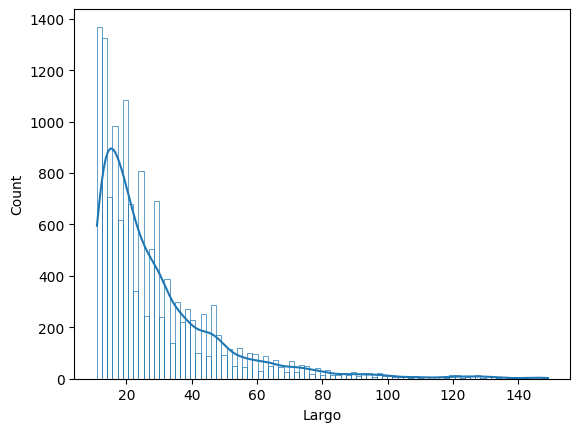

In [159]:
sns.histplot(data=df_Antifungipep, x="Largo", fill=False, kde=True)

In [160]:
dataframe_a_descargar = df_Antifungipep
dataframe_a_descargar.to_csv(
    'Antifungipep.csv',  # Nombre que tendrá el archivo
    index=False                        # Importante: No incluir el índice de filas de Pandas
)
files.download('Antifungipep.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>